In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Natural Language Processing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NLP dataset 1.csv to NLP dataset 1.csv


In [ ]:
dataset = pd.read_csv('NLP dataset 1.csv')
dataset.head()

,text,class
0,Now all @Apple has to do is get swype on the i...,1
1,@Apple will be adding more carrier support to ...,1
2,Hilarious @youtube video - guy does a duet wit...,1
3,@RIM you made it too easy for me to switch to ...,1
4,I just realized that the reason I got into twi...,1


In [ ]:
print(dataset)

                                                  text  class
0    Now all @Apple has to do is get swype on the i...      1
1    @Apple will be adding more carrier support to ...      1
2    Hilarious @youtube video - guy does a duet wit...      1
3    @RIM you made it too easy for me to switch to ...      1
4    I just realized that the reason I got into twi...      1
..                                                 ...    ...
474  Houston we have a problem!! My iPad has been r...      0
475  #Siri went down for a little while last night....      0
476  @ford should have teamed up with @Apple instea...      0
477  RT @gdcurry: Really @Apple?  What have you don...      0
478                                DAMN YOU !!! @apple      0

[479 rows x 2 columns]


In [ ]:
#Print Total number of Rows & columns in dataset
print(dataset.shape)

(479, 2)


In [ ]:
#Print Information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    479 non-null    object
 1   class   479 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.6+ KB


In [ ]:
#Data types of Columns
types = dataset.dtypes
print(types)

text     object
class     int64
dtype: object


In [ ]:
#Count total number of classes in Data
class_counts = dataset.groupby('class').size()
print(class_counts)

class
0    316
1    163
dtype: int64


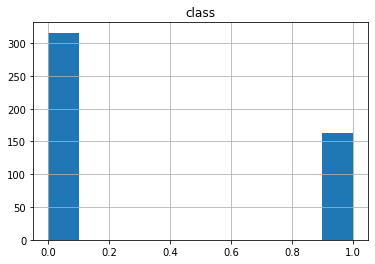

In [ ]:
# Histogram plot
from matplotlib import pyplot
dataset.hist()
pyplot.show()

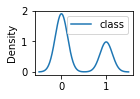

In [ ]:
#Density Plot
dataset.plot(kind='density' ,subplots=True, layout=(3,3), sharex=False)
pyplot.show()


In [ ]:
#Finding missing values
dataset.isnull().sum()

text     0
class    0
dtype: int64

In [ ]:
# Removing index column
dataset = dataset.dropna()

In [ ]:
print(dataset)

                                                  text  class
0    Now all @Apple has to do is get swype on the i...      1
1    @Apple will be adding more carrier support to ...      1
2    Hilarious @youtube video - guy does a duet wit...      1
3    @RIM you made it too easy for me to switch to ...      1
4    I just realized that the reason I got into twi...      1
..                                                 ...    ...
474  Houston we have a problem!! My iPad has been r...      0
475  #Siri went down for a little while last night....      0
476  @ford should have teamed up with @Apple instea...      0
477  RT @gdcurry: Really @Apple?  What have you don...      0
478                                DAMN YOU !!! @apple      0

[479 rows x 2 columns]


In [ ]:
print(dataset.loc[0][0])

Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is


In [ ]:
# Let us take text to understand process of data preprocessing in NLP
text1="Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is"

In [ ]:
# First step: cleaning Text and removing number and punctuation marks.
import re
review = re.sub('[^a-zA-Z]', ' ', dataset['text'][0])
print(text1)
print('-------------------------------------------------')
print('Review after removing number and punctuation marks. ')
print(review)

Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is
-------------------------------------------------
Review after removing number and punctuation marks. 
Now all  Apple has to do is get swype on the iphone and it will be crack  Iphone that is


In [ ]:
# Second  step: converting text into lower case.
review=review.lower()
print(text1)
print('-------------------------------------------------')
print('Text after convering into lower case')
print(review)

Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is
-------------------------------------------------
Text after convering into lower case
now all  apple has to do is get swype on the iphone and it will be crack  iphone that is


In [ ]:
# Third step: Removing stop words like 'this, the'
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
review = review.split()
print(review)

['now', 'all', 'apple', 'has', 'to', 'do', 'is', 'get', 'swype', 'on', 'the', 'iphone', 'and', 'it', 'will', 'be', 'crack', 'iphone', 'that', 'is']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Third step: Removing stop words like 'this, the'
# set function is generally used for long article to fasten process
review1 = [word for word in review if not word in set(stopwords.words('english'))]
print('Text after removing stop words')
print(review1)

Text after removing stop words
['apple', 'get', 'swype', 'iphone', 'crack', 'iphone']


In [ ]:
# Fourth step: converting stemming words
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
review = [ps.stem(word) for word in review1 if not word in set(stopwords.words('english'))]
print('After converting stemmer words')
print(review)

After converting stemmer words
['appl', 'get', 'swype', 'iphon', 'crack', 'iphon']


In [ ]:
# joining these words of list
review2 = ' '.join(review)

In [ ]:
# Creating the Bag of Words model
corpus1 = []
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
print(review2)
corpus1.append(review2)
print(corpus1)
X = cv.fit_transform(corpus1).toarray()
print(X)

appl get swype iphon crack iphon
['appl get swype iphon crack iphon']
[[1 1 1 2 1]]


In [ ]:
# Cleaning the texts for all review using for loop
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset.iloc[:,0][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    print(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


appl get swype iphon crack iphon
appl ad carrier support iphon announc
hilari youtub video guy duet appl siri pretti much sum love affair http co exbnqji
rim made easi switch appl iphon see ya
realiz reason got twitter io thank appl
current blackberri user littl bit disappoint move android appl iphon
strangest thing siri said far sooo glad appl gave siri sens humor http co twaeudbp via happyplac
great close person event appl tonight regent st store
compani experi best custom servic asid zappo appl
appli job appl hope call lol
rt jamaicanidl lmao think appl onto someth magic die haha siri suggest find whore h
lmao think appl onto someth magic die haha siri suggest find whore hide bodi lolol
rt philliprowntre regist appl develop hope actual help greatli appreci
wow great deal refurb ipad first gen model rt appl offer great deal refurbish st gen ipad http co ukwokbgd appl
regist appl develop hope actual help greatli appreci
current learn mandarin upcom trip hong kong gotta hand appl iphon

In [ ]:
print(corpus)

['appl get swype iphon crack iphon', 'appl ad carrier support iphon announc', 'hilari youtub video guy duet appl siri pretti much sum love affair http co exbnqji', 'rim made easi switch appl iphon see ya', 'realiz reason got twitter io thank appl', 'current blackberri user littl bit disappoint move android appl iphon', 'strangest thing siri said far sooo glad appl gave siri sens humor http co twaeudbp via happyplac', 'great close person event appl tonight regent st store', 'compani experi best custom servic asid zappo appl', 'appli job appl hope call lol', 'rt jamaicanidl lmao think appl onto someth magic die haha siri suggest find whore h', 'lmao think appl onto someth magic die haha siri suggest find whore hide bodi lolol', 'rt philliprowntre regist appl develop hope actual help greatli appreci', 'wow great deal refurb ipad first gen model rt appl offer great deal refurbish st gen ipad http co ukwokbgd appl', 'regist appl develop hope actual help greatli appreci', 'current learn mand

In [ ]:
#    Adding corpus to csv
corpus_dataset = pd.DataFrame(corpus)
corpus_dataset['corpus'] = corpus_dataset
corpus_dataset = corpus_dataset.drop([0], axis = 1)
corpus_dataset.to_csv('/content/drive/My Drive/Colab Notebooks/corpus_dataset-project-5.csv')

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
print(cv)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

CountVectorizer(max_features=1500)


In [ ]:
print(X)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(X.shape)

(479, 1500)


In [ ]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
print(y.shape)

(479,)


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)


In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ')
print(cm)

Confusion matrix: 
[[139  16]
 [ 35  50]]


In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))


Accuracy: 78.75


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))

Precision: 75.758


In [ ]:
from sklearn.metrics import f1_score
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

F-Measure: 66.225


In [ ]:
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))

Recall: 58.824


In [ ]:
# save the model to disk
import joblib
filename = '/content/drive/My Drive/Colab Notebooks/project_NLP-5.sav'
joblib.dump(classifier, filename)

# some time later...

# load the model from disk
naive_bayes_model = joblib.load(filename)
result = naive_bayes_model.score(X_test, y_test)
print(result)

0.7875


In [ ]:
Review = "shit" #@param {type:"string"}
input_data = [Review]

input_data = cv.transform(input_data).toarray()
print(input_data)

input_pred = classifier.predict(input_data)

input_pred = input_pred.astype(int)


if input_pred[0]==1:
    print("Review is Positive")
else:
    print("Review is Negative")

[[0 0 0 ... 0 0 0]]
Review is Negative


In [ ]:
import pickle
print("[INFO] Saving model...")
# Save the trained model as a pickle string.
saved_model=pickle.dump(classifier,open('/content/drive/My Drive/Colab Notebooks/project_nlp-5.pkl', 'wb'))
# Saving model to disk

[INFO] Saving model...


In [ ]:
# Load the pickled model
model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/project_nlp-5.pkl','rb'))
# Use the loaded pickled model to make predictions
model.predict(X_test)

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
%mkdir templates -p

In [ ]:
%%writefile templates/index.html
<!DOCTYPE html>
<html >
<!--From https://codepen.io/frytyler/pen/EGdtg-->
<head>
<title>Machine Learning  Linear Regression Deployment</title>
<meta charset="UTF-8">
<link href='https://fonts.googleapis.com/css?family=Open+Sans+Condensed:300' rel='stylesheet' type='text/css'>
<!-- JavaScript Bundle with Popper -->
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.0/dist/js/bootstrap.bundle.min.js" integrity="sha384-A3rJD856KowSb7dwlZdYEkO39Gagi7vIsF0jrRAoQmDKKtQBHUuLZ9AsSv4jD4Xa" crossorigin="anonymous"></script>
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta1/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-giJF6kkoqNQ00vy+HMDP7azOuL0xtbfIcaT9wjKHr8RbDVddVHyTfAAsrekwKmP1" crossorigin="anonymous">
<style><!DOCTYPE html>

h1 {text-align: center;}
h2 {text-align: center;}
h3 {text-align: center;}
p {text-align: center;}
div {text-align: center;}
</style>
</head>

<body>

<div class="" style="background-color:red;" >
<div class="clearfix">

<div class="col-md-12">
<center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center>
<center><p style="font-size:30px;color:white;margin-top:10px;">Department of Computer Engineering</p></center>
<center><p style="font-size:25px;color:white;margin-top:10px;">Summer Internship 2022 on Machine learning and Data Science</p></center>
</div>

<div class="login">
<h2 >NLP Analysis to predict the text is Positive or Negative</h2>
<h4>Developed by Alok Raj </h4>
<!-- Main Input For Receiving Query to our ML -->
<form action="{{ url_for('predict')}}"method="get">
<div class="form-floating mb-3">

<input type="text" class="form-control" id="text" name="text" step="any" min="0" max="1000" placeholder="0" required="required">
<label for="textInput">Enter the text</label>
</div>
<br>

<br>
<button type="submit" class="btn btn-primary btn-block btn-large">Predict the text</button>
</form>
<br>
<br>
{{ prediction_text }}

</div>

<div class="" style="background-color:blue;" >
<div class="clearfix">

<div class="col-md-12">
 <center><p style="font-size:25px;color:white;margin-top:20px;">Experiment Performed in Summer internship 2022 from 27 June to 8 August </p></center>
</div>
</div>
</div>
</body>
</html>

Writing templates/index.html


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 4.4 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=ad80b3d6ae5a3d1c25b9a6a4987425f81cc0c9e220485d61614e070197885ec1
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [ ]:
!ngrok authtoken 2CT4MHWPe5W1c3i8WbPIkMfV3YB_7M1jKwhLC4HVFvS11Rbf

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template
from flask_ngrok import run_with_ngrok
import pickle
import pandas as pd
import matplotlib.pyplot as plt

app = Flask(__name__)
model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/project_nlp-5.pkl','rb'))
run_with_ngrok(app)
@app.route('/')
def home():

    return render_template("index.html")

@app.route('/predict',methods=['GET'])


def predict():
  dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/NLP dataset 1.csv')
  # First step: cleaning Text and removing number and punctuation marks.
  # Cleaning the texts for all review using for loop
  import re
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  from nltk.stem.porter import PorterStemmer
  corpus = []
  for i in range(0, 479):
    review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    #print(review)
    corpus.append(review)
  # Creating the Bag of Words model
  from sklearn.feature_extraction.text import CountVectorizer
  cv = CountVectorizer(max_features = 1500)
  #print(cv)
  X = cv.fit_transform(corpus).toarray()
  import re
  review = re.sub('[^a-zA-Z]', ' ', str('text'))
  review=review.lower()
  print(review)
  # Third step: Removing stop words like 'this, the'
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  review = review.split()
  print(review)
  # Third step: Removing stop words like 'this, the'
   # set function is generally used for long article to fastem process
  review1 = [word for word in review if not word in set(stopwords.words('english'))]
  print(review1)
  # Fourth step: converting stemming words
  from nltk.stem.porter import PorterStemmer
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review1 if not word in set(stopwords.words('english'))]
  print(review)
  # joining these words of list
  review2 = ' '.join(review)
  print(review2)
  # Creating the Bag of Words model

  X = cv.transform(review).toarray()
  input_pred = model.predict(X)
  input_pred = input_pred.astype(float)
  print(input_pred)
  if input_pred[0]==1:
    result= "Review is Positive"
  else:
    result="Review is negative"


    result1 = (request.args.get('text'))
    prediction = model.predict([[result1]])




  return render_template('index.html', prediction_text='NLP Model  has predicted about the text : {}'.format(prediction))


app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://319c-35-229-207-29.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [07/Aug/2022 13:51:38] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Aug/2022 13:51:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2022 13:51:39] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [07/Aug/2022 13:51:39] "GET /favicon.ico HTTP/1.1" 404 -
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[2022-08-07 13:51:47,361] ERROR in app: Exception on /predict [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1821, in handle_user_exception
    r

text
['text']
['text']
['text']
text
[1.]
